In [9]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1>Maralia Cells Classification</h1>

Dataset Link: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

<h2>Import Libraries</h2>

In [30]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.preprocessing.image import load_img, img_to_array
import warnings
warnings.filterwarnings('ignore')

<h2>Load Data</h2>

In [31]:
parasitized = os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/")
uninfected = os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/")

In [32]:
parasitized[0], uninfected[0]

('C99P60ThinF_IMG_20150918_141001_cell_93.png',
 'C203ThinF_IMG_20151029_102123_cell_51.png')

<h2>Data Visualization</h2>

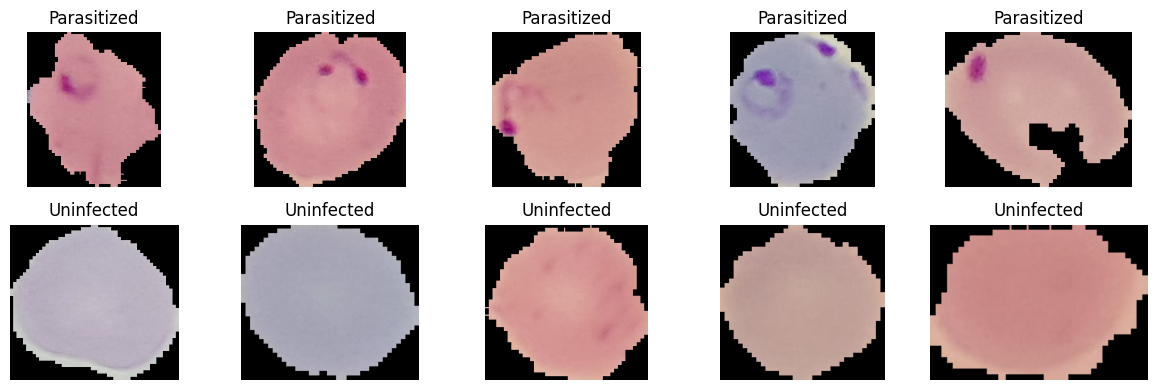

In [33]:
parasitized_path = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/"
uninfected_path = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/"
fig, axes = plt.subplots(2, 5, figsize=(12, 4))

# Display Parasitized images
for i, img_name in enumerate(parasitized[:5]):
    img = cv2.imread(os.path.join(parasitized_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    axes[0, i].imshow(img)
    axes[0, i].set_title("Parasitized")
    axes[0, i].axis("off")

# Display Uninfected images
for i, img_name in enumerate(uninfected[:5]):
    img = cv2.imread(os.path.join(uninfected_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    axes[1, i].imshow(img)
    axes[1, i].set_title("Uninfected")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

Number of Parasitized images: 13780
Number of Uninfected images: 13780


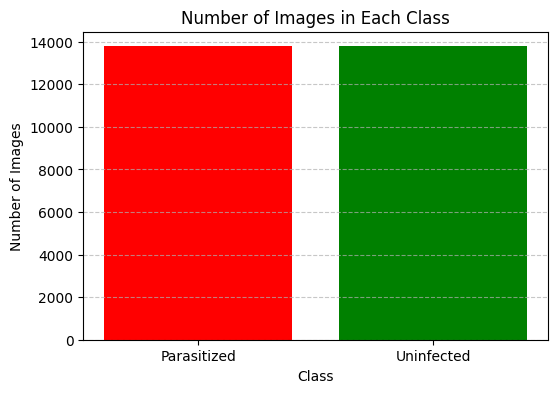

In [34]:
print(f"Number of Parasitized images: {len(parasitized)}")
print(f"Number of Uninfected images: {len(uninfected)}")

classes = ["Parasitized", "Uninfected"]
counts = [len(parasitized), len(uninfected)]

plt.figure(figsize=(6, 4))
plt.bar(classes, counts, color=["red", "green"])
plt.title("Number of Images in Each Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() # Data is balanced

<h2>Data Preparation</h2>

In [35]:
data = []
labels = []
for img in parasitized:
    try:
        img_read = plt.imread(parasitized_path + '/' + img)
        img_resize = cv2.resize(img_read, (64, 64))
        img_array = img_to_array(img_resize) 
        data.append(img_array)
        labels.append(1)
    except:
        None

for img in uninfected:
    try:
        img_read = plt.imread(uninfected_path + "/" + img)
        img_resize = cv2.resize(img_read, (64, 64))
        img_array = img_to_array(img_resize) 
        data.append(img_array)
        labels.append(0)
    except:
        None

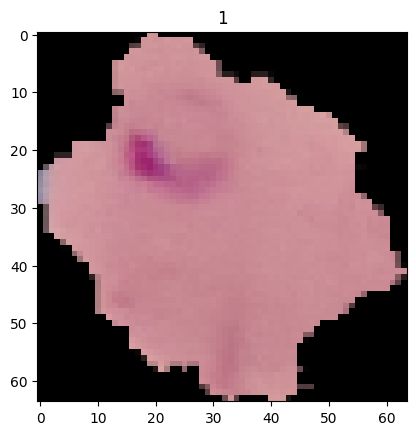

In [36]:
plt.imshow(data[0])
plt.title(labels[0])
plt.show()

In [37]:
image_data = np.array(data)
labels = np.array(labels)

In [38]:
image_data.shape

(27558, 64, 64, 3)

In [39]:
# Shuffle the data and labels to ensure randomness
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [40]:
image_data[0], labels[0]

(array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32),
 0)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state= 42)

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22046, 64, 64, 3), (5512, 64, 64, 3), (22046,), (5512,))

In [43]:
# Flatten the images into 1D arrays
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)
print(f"Flattened train shape: {x_train_flattened.shape}")
print(f"Flattened test shape: {x_test_flattened.shape}")

Flattened train shape: (22046, 12288)
Flattened test shape: (5512, 12288)


In [44]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(x_train_flattened, y_train)
logistic_preds = logistic_model.predict(x_test_flattened)
print("Logistic Regression Results:")
print(classification_report(y_test, logistic_preds))
print(f"Accuracy: {accuracy_score(y_test, logistic_preds):.2f}")

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      2735
           1       0.68      0.64      0.66      2777

    accuracy                           0.67      5512
   macro avg       0.67      0.67      0.67      5512
weighted avg       0.67      0.67      0.67      5512

Accuracy: 0.67


In [45]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_flattened, y_train)
knn_preds = knn_model.predict(x_test_flattened)
print("KNN Classifier Results:")
print(classification_report(y_test, knn_preds))
print(f"Accuracy: {accuracy_score(y_test, knn_preds):.2f}")

KNN Classifier Results:
              precision    recall  f1-score   support

           0       0.56      0.84      0.67      2735
           1       0.69      0.34      0.46      2777

    accuracy                           0.59      5512
   macro avg       0.62      0.59      0.56      5512
weighted avg       0.62      0.59      0.56      5512

Accuracy: 0.59


# Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix For Logistic Regression\n",confusion_matrix(y_test,logistic_preds))
print("Confusion Matrix For KNN \n",confusion_matrix(y_test,knn_preds))

Confusion Matrix For Logistic Regression
 [[1906  829]
 [ 995 1782]]
Confusion Matrix For KNN 
 [[2306  429]
 [1829  948]]


# ConfusionMatrixDisplay

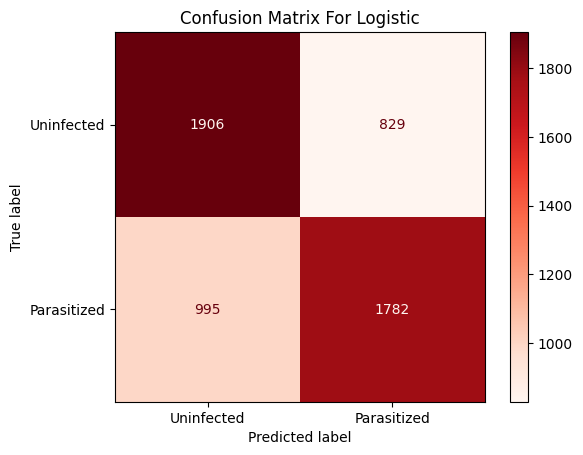

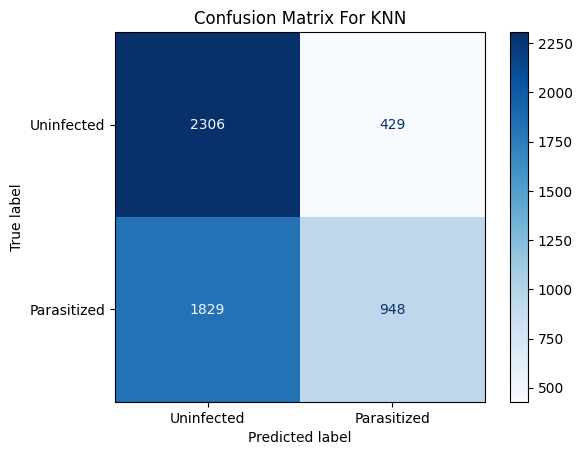

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
#Logistic
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,logistic_preds), display_labels=['Uninfected', 'Parasitized'])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix For Logistic")
plt.show()
#KNN
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,knn_preds), display_labels=['Uninfected', 'Parasitized'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix For KNN")
plt.show()